#### Formulasi masalah:
membuat program yang berfungsi untuk
memprediksi mengenai apakah pelanggan tertarik untuk membeli sebauh kendaraan baru
berdasarkan data pelanggan yang telah diberikan dengan menerapkan metode classification

In [ ]:
IMPORT LIBRARY

In [1]:
#import library untuk mendukung pengerjaan

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import math
import seaborn as sns
from pandas import DataFrame
import random as rd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
import time, datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

#lakukan pemanggilan dataset yang sudah disiapkan
df_train = pd.read_csv('kendaraan_train.csv')
df_test = pd.read_csv('kendaraan_test.csv')
display(df_train)


,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [2]:
df_train.drop('id',axis=1,inplace=True)

In [3]:
#untuk mengganti type data dari kategorikal menjadi numerical 
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].replace(['Pernah','Tidak'],[1,0])
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace(['< 1 Tahun','1-2 Tahun','> 2 Tahun'],[0,0.5,1])
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].replace(['Wanita','Pria'],[0,1])

In [4]:
shape = df_train.shape
print("Data Test shape")
print("Rows: ",shape[0])
print('Columns: ',shape[1])

Data Test shape
Rows:  285831
Columns:  11


In [5]:
shape = df_test.shape
print("Data Test shape")
print("Rows: ",shape[0])
print('Columns: ',shape[1])

Data Test shape
Rows:  47639
Columns:  11


In [6]:
#untuk mengecek apakah ada handling missing value atau tidak
df_train.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [7]:
#untuk mengassign value yang hilang dengan nilai mean atau modus disesuaikan data nya lebih cocok menggunakan mean atau modus
df_train['Jenis_Kelamin'].fillna(value=df_train['Jenis_Kelamin'].mode()[0],inplace=True)
df_train['Umur'].fillna(value=math.ceil(df_train['Umur'].mean()),inplace=True)
df_train['SIM'].fillna(value=df_train['SIM'].mode()[0],inplace=True)
df_train['Kode_Daerah'].fillna(value=df_train['Kode_Daerah'].mode()[0],inplace=True)
df_train['Sudah_Asuransi'].fillna(value=df_train['Sudah_Asuransi'].mode()[0],inplace=True)
df_train['Umur_Kendaraan'].fillna(value=df_train['Umur_Kendaraan'].mode()[0],inplace=True)
df_train['Kendaraan_Rusak'].fillna(value=df_train['Kendaraan_Rusak'].mode()[0],inplace=True)
df_train['Premi'].fillna(value=math.ceil(df_train['Premi'].mean()),inplace=True)
df_train['Kanal_Penjualan'].fillna(value=df_train['Kanal_Penjualan'].mode()[0],inplace=True)
df_train['Lama_Berlangganan'].fillna(value=math.ceil(df_train['Lama_Berlangganan'].mean()),inplace=True)

#setelah di assign dengan nilai baru cek lagi apakah masih ada handling missing value atau tidak
df_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [8]:
#cek apakah masih ada data kategorikal atauu tidak
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  float64
 1   Umur               285831 non-null  float64
 2   SIM                285831 non-null  float64
 3   Kode_Daerah        285831 non-null  float64
 4   Sudah_Asuransi     285831 non-null  float64
 5   Umur_Kendaraan     285831 non-null  float64
 6   Kendaraan_Rusak    285831 non-null  float64
 7   Premi              285831 non-null  float64
 8   Kanal_Penjualan    285831 non-null  float64
 9   Lama_Berlangganan  285831 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 24.0 MB


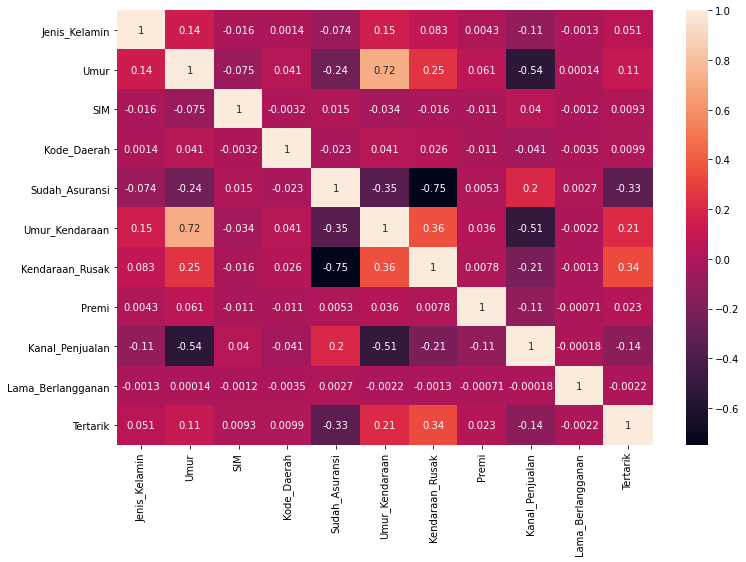

In [9]:
# untuk mengcek korelasi yang dimiliki antar data 
# ket: semakin terang atau mendekati nilai satu maka data tersebut memiliki korelasi yang tinggi 

plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot= True)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


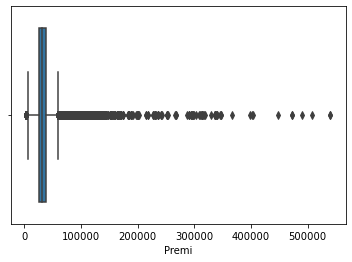

In [10]:
#cek ada pencilan atau outliers pada data atau tidak 
sns.boxplot('Premi', data=df_train)

In [11]:
#fungsi untuk mencari pencilan nya berada dimana
def finding_outlier(df):
    Q1= df.quantile(0.25)
    Q3= df.quantile(0.75)
    IQR= Q3-Q1
    df_final= df[(df<(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
    return df_final

print(finding_outlier(df_train['Premi']))

0         28029.0
1         25800.0
2         32733.0
3          2630.0
4         34857.0
           ...   
285826    25988.0
285827    44686.0
285828    49751.0
285829    30503.0
285830    36480.0
Name: Premi, Length: 276960, dtype: float64


In [12]:
#fungsi untuk menghilangkan outliers 
def remove_outlier(df):
    Q1= df.quantile(0.25)
    Q3= df.quantile(0.75)
    IQR= Q3-Q1
    df_final= df[((df<(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR))))]
    return df_final

In [13]:
df = remove_outlier(df_train[['Premi']])
df.dropna(axis= 0)
df

,Premi
0,28029.0
1,25800.0
2,32733.0
3,2630.0
4,34857.0
...,...
285826,25988.0
285827,44686.0
285828,49751.0
285829,30503.0


In [14]:
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,1.0,1.0,25800.0,29.0,158.0,0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,0.5,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,1.0,1.0,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,0.5,0.0,30503.0,124.0,270.0,0


c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


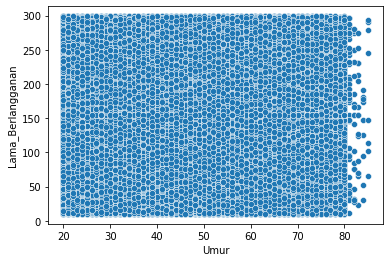

In [15]:
#untuk melihat data nya seperti apa

sns.scatterplot(df_train['Umur'], df_train['Lama_Berlangganan'])
plt.show()

In [16]:
df_test['Umur'].fillna(value=math.ceil(df_test['Umur'].mean()),inplace=True)
df_test['Premi'].fillna(value=math.ceil(df_test['Premi'].mean()),inplace=True)
df_test['Lama_Berlangganan'].fillna(value=math.ceil(df_test['Lama_Berlangganan'].mean()),inplace=True)
df_test['Umur_Kendaraan'].fillna(value=df_test['Umur_Kendaraan'].mode()[0],inplace=True)
df_test['Jenis_Kelamin'].fillna(value=df_test['Jenis_Kelamin'].mode()[0],inplace=True)
df_test['SIM'].fillna(value=df_test['SIM'].mode()[0],inplace=True)
df_test['Kode_Daerah'].fillna(value=df_test['Kode_Daerah'].mode()[0],inplace=True)
df_test['Sudah_Asuransi'].fillna(value=df_test['Sudah_Asuransi'].mode()[0],inplace=True)
df_test['Kendaraan_Rusak'].fillna(value=df_test['Kendaraan_Rusak'].mode()[0],inplace=True)
df_test['Kanal_Penjualan'].fillna(value=df_test['Kanal_Penjualan'].mode()[0],inplace=True)

In [17]:
df_test['Kendaraan_Rusak'] = df_test['Kendaraan_Rusak'].replace(['Pernah','Tidak'],[1,0])
df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].replace(['< 1 Tahun','1-2 Tahun','> 2 Tahun'],[0,0.5,1])
df_test['Jenis_Kelamin'] = df_test['Jenis_Kelamin'].replace(['Wanita','Pria'],[0,1])

In [18]:
print("Checking Null Value in Data Test:")
print(df_test.isnull().sum())

Checking Null Value in Data Test:
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


In [19]:
print("Data Types in Data Test: ")
print(df_test.dtypes)

Data Types in Data Test: 
Jenis_Kelamin          int64
Umur                   int64
SIM                    int64
Kode_Daerah            int64
Sudah_Asuransi         int64
Umur_Kendaraan       float64
Kendaraan_Rusak        int64
Premi                  int64
Kanal_Penjualan        int64
Lama_Berlangganan      int64
Tertarik               int64
dtype: object


c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


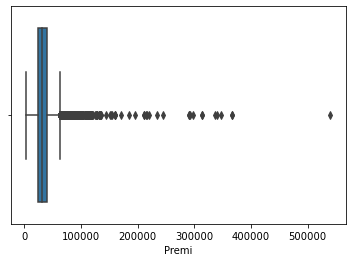

In [20]:
sns.boxplot('Premi', data=df_test)


In [21]:
display(df_test)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,0.5,1,46963,26,145,0
1,1,22,1,47,1,0.0,0,39624,152,241,0
2,1,24,1,28,1,0.0,0,110479,152,62,0
3,1,46,1,8,1,0.5,0,36266,124,34,0
4,1,35,1,23,0,0.5,1,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,61,1,46,0,1.0,1,31039,124,67,0
47635,1,41,1,15,0,0.5,1,2630,157,232,0
47636,1,24,1,29,1,0.0,0,33101,152,211,0
47637,1,59,1,30,0,0.5,1,37788,26,239,1


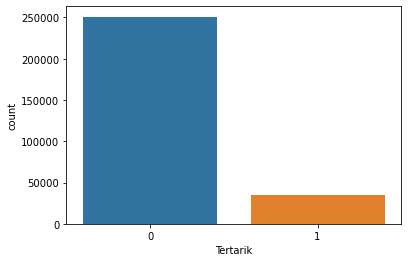

In [22]:
sns.countplot(x= df_train['Tertarik'], data=df_train)

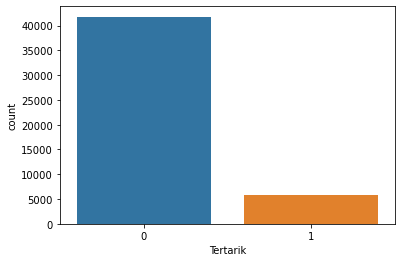

In [23]:
sns.countplot(x= df_test['Tertarik'], data=df_test)

In [24]:
def finding_outlier(df):
    Q1= df.quantile(0.25)
    Q3= df.quantile(0.75)
    IQR= Q3-Q1
    df_final= df[(df<(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
    return df_final
print(finding_outlier(df_test['Premi']))

0        46963
1        39624
3        36266
4        26963
5        42721
         ...  
47634    31039
47635     2630
47636    33101
47637    37788
47638     2630
Name: Premi, Length: 46368, dtype: int64


In [25]:
def remove_outlier(df):
    Q1= df.quantile(0.25)
    Q3= df.quantile(0.75)
    IQR= Q3-Q1
    df_final= df[((df<(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR))))]
    return df_final

In [26]:
df = remove_outlier(df_train[['Premi']])
df.dropna(axis= 0)
df

,Premi
0,28029.0
1,25800.0
2,32733.0
3,2630.0
4,34857.0
...,...
285826,25988.0
285827,44686.0
285828,49751.0
285829,30503.0


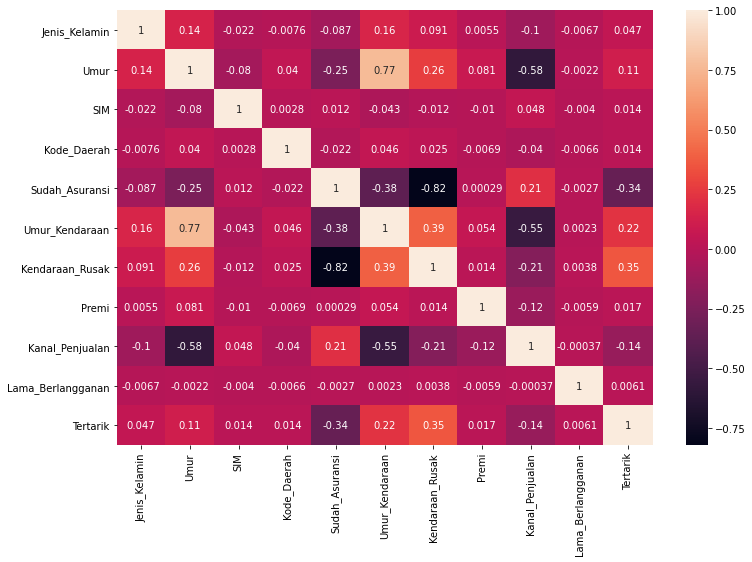

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df_test.corr(),annot= True)

In [28]:
MinMaxScaler = MinMaxScaler()
X_train = MinMaxScaler.fit_transform(df_train.drop(['Tertarik'],axis =1))
y_train = df_train['Tertarik']
X_test = MinMaxScaler.fit_transform(df_test.drop(['Tertarik'],axis =1))
y_test = df_test['Tertarik']

In [29]:
display(X_train)
display(y_train)
display(X_test)
display(y_test)

array([[0.        , 0.15384615, 1.        , ..., 0.04725088, 0.93209877,
        0.30103806],
       [1.        , 0.43076923, 1.        , ..., 0.04310417, 0.17283951,
        0.51211073],
       [1.        , 0.01538462, 1.        , ..., 0.05600193, 0.98148148,
        0.37716263],
       ...,
       [0.        , 0.04615385, 1.        , ..., 0.08766127, 0.93209877,
        0.74740484],
       [1.        , 0.73846154, 1.        , ..., 0.05185337, 0.75925926,
        0.89965398],
       [1.        , 0.38461538, 1.        , ..., 0.06297264, 0.15432099,
        0.11764706]])

0         0
1         0
2         0
3         0
4         0
         ..
285826    0
285827    0
285828    0
285829    0
285830    0
Name: Tertarik, Length: 285831, dtype: int64

array([[0.        , 0.44615385, 1.        , ..., 0.08247463, 0.15432099,
        0.46712803],
       [1.        , 0.03076923, 1.        , ..., 0.06882157, 0.93209877,
        0.79930796],
       [1.        , 0.06153846, 1.        , ..., 0.20063624, 0.93209877,
        0.1799308 ],
       ...,
       [1.        , 0.06153846, 1.        , ..., 0.05668654, 0.93209877,
        0.69550173],
       [1.        , 0.6       , 1.        , ..., 0.06540597, 0.15432099,
        0.79238754],
       [1.        , 0.49230769, 1.        , ..., 0.        , 0.75925926,
        0.55363322]])

0        0
1        0
2        0
3        0
4        0
        ..
47634    0
47635    0
47636    0
47637    1
47638    0
Name: Tertarik, Length: 47639, dtype: int64

In [30]:
start_time = time.time()

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = round(model.score(X_test, y_test) * 100, 2)


gbt_time = (time.time() - start_time)
print(acc)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

87.69
Running Time: 0:00:41.157389


In [31]:
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[41775     3]
 [ 5861     0]]


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.00      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.44      0.50      0.47     47639
weighted avg       0.77      0.88      0.82     47639



In [32]:
display(df_train)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,1.0,1.0,25800.0,29.0,158.0,0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,0.5,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,1.0,1.0,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,0.5,0.0,30503.0,124.0,270.0,0


In [33]:
display(df_test)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,0.5,1,46963,26,145,0
1,1,22,1,47,1,0.0,0,39624,152,241,0
2,1,24,1,28,1,0.0,0,110479,152,62,0
3,1,46,1,8,1,0.5,0,36266,124,34,0
4,1,35,1,23,0,0.5,1,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,61,1,46,0,1.0,1,31039,124,67,0
47635,1,41,1,15,0,0.5,1,2630,157,232,0
47636,1,24,1,29,1,0.0,0,33101,152,211,0
47637,1,59,1,30,0,0.5,1,37788,26,239,1


In [34]:
# MinMaxScaler = MinMaxScaler()
X_latih = MinMaxScaler.fit_transform(df_train.drop(['Tertarik'],axis =1))
y_latih = df_train['Tertarik']
X_tes = MinMaxScaler.fit_transform(df_test.drop(['Tertarik'],axis =1))
y_tes = df_test['Tertarik']

In [35]:
naiveBayes = GaussianNB()
naiveBayes.fit(X_latih, y_latih)

GaussianNB()

In [36]:
hasilPred = naiveBayes.predict(X_tes)

In [37]:
print('Confusion Matris\n', confusion_matrix(y_tes, hasilPred))
print('\n')
print(classification_report(y_tes, hasilPred))

Confusion Matris
 [[24855 16923]
 [  153  5708]]


              precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.97      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639



In [38]:
df_train.to_csv('KendaraanBaruT.csv', index=False)

In [39]:
df_test.to_csv('KendaraanBaruTest.csv', index=False)